#Deep Learning Basics

Source: https://github.com/lexfridman/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb

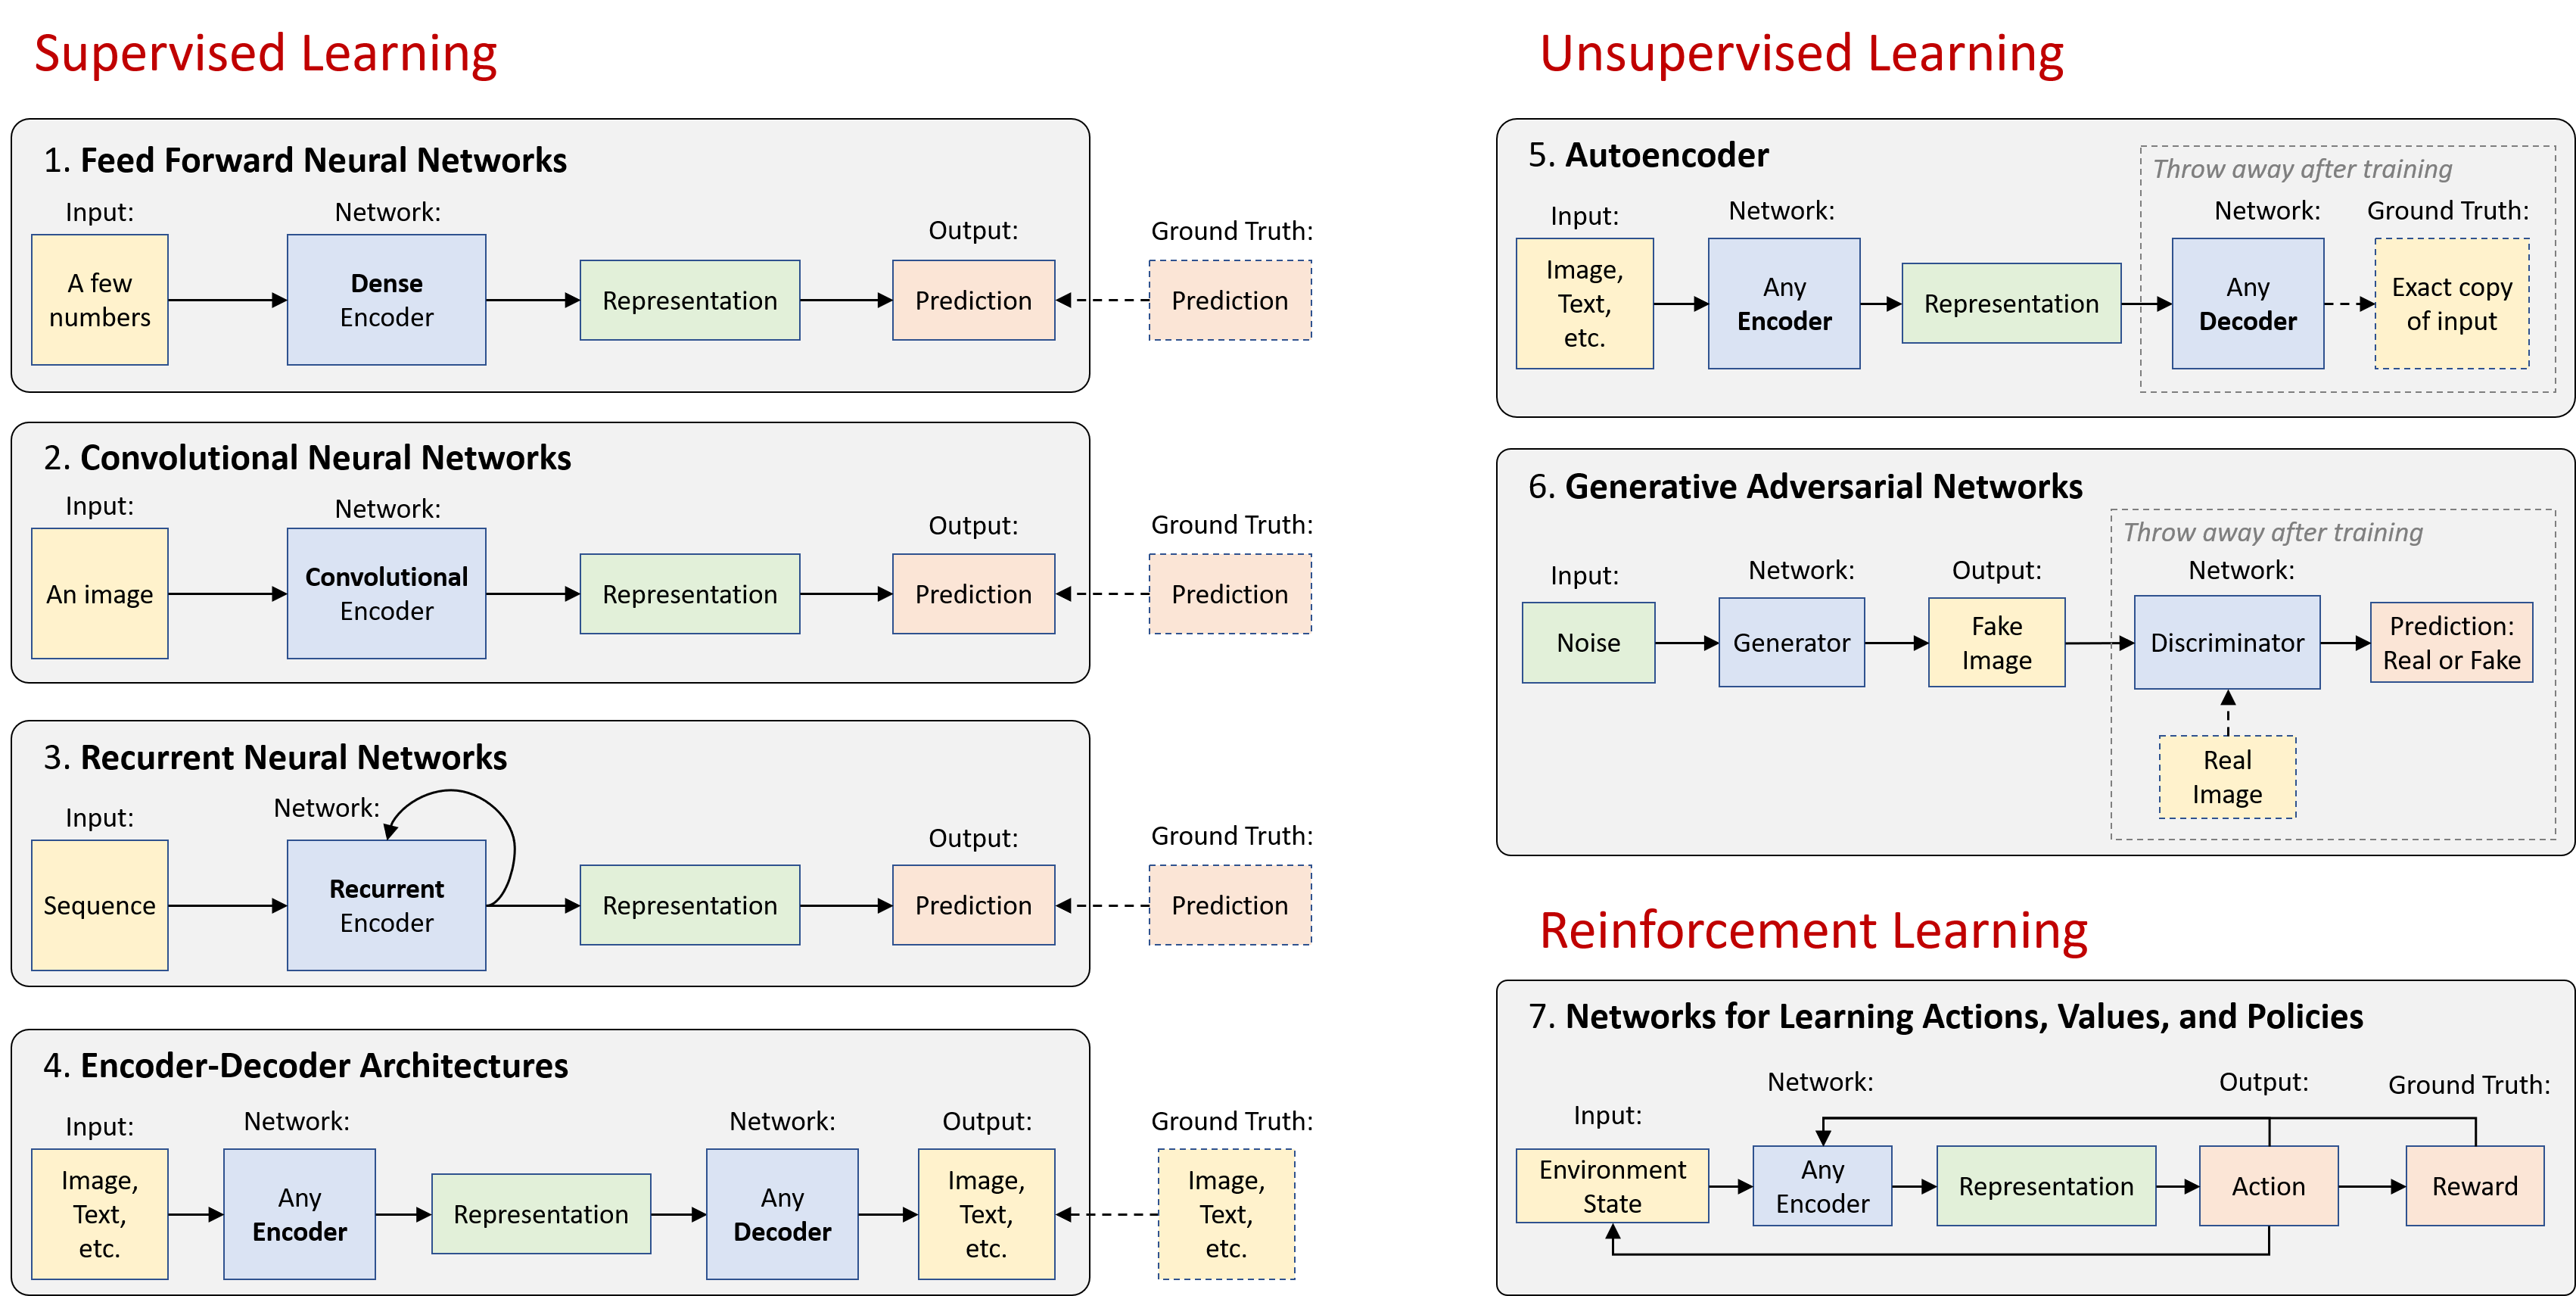

Encoders find patterns in raw data to form compact, useful representations. Decoders generate new data or high-resolution useful infomation from those representations.

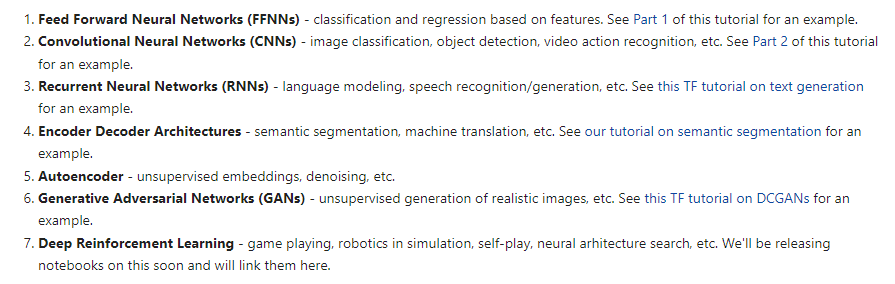

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2.15.0


#1. Feed-Forward Neural Networks with Regression

Running pipeline for california_housing dataset...
Epoch 1/100
413/413 [==============================] - 5s 5ms/step - loss: 1.3275 - val_loss: 0.5513
Epoch 2/100
  7/413 [..............................] - ETA: 3s - loss: 0.6813

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


413/413 [==============================] - 1s 3ms/step - loss: 0.6315 - val_loss: 0.5293
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 0.6019 - val_loss: 0.4649
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5300 - val_loss: 0.4341
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 0.5083 - val_loss: 0.4247
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 0.4900 - val_loss: 0.4156
Epoch 7/100
413/413 [==============================] - 1s 2ms/step - loss: 0.4805 - val_loss: 0.3980
Epoch 8/100
413/413 [==============================] - 1s 2ms/step - loss: 0.4456 - val_loss: 0.3941
Epoch 9/100
413/413 [==============================] - 1s 2ms/step - loss: 0.4261 - val_loss: 0.3875
Epoch 10/100
413/413 [==============================] - 1s 2ms/step - loss: 0.4279 - val_loss: 0.3858
Epoch 11/100
413/413 [==============================] - 1s 3ms/step - loss: 0.4149 - val_loss: 0.3705


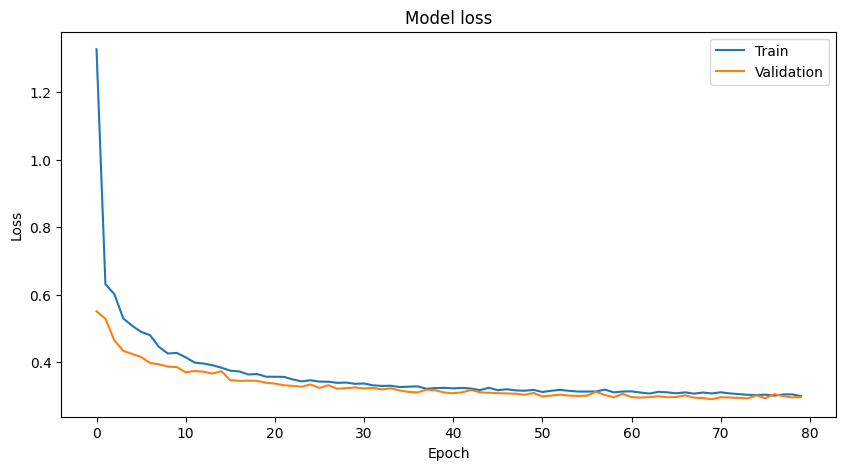



Running pipeline for wine_quality dataset...
Epoch 1/100
4/4 [==============================] - 1s 57ms/step - loss: 3.6244 - val_loss: 2.5548
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 2.7164 - val_loss: 1.9075
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 2.2117 - val_loss: 1.4437
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 1.5761 - val_loss: 1.1005
Epoch 5/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 16ms/step - loss: 1.2423 - val_loss: 0.8488
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.9994 - val_loss: 0.6512
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.8580 - val_loss: 0.4910
Epoch 8/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6372 - val_loss: 0.3611
Epoch 9/100
4/4 [==============================] - 0s 17ms/step - loss: 0.5034 - val_loss: 0.2595
Epoch 10/100
4/4 [==============================] - 0s 17ms/step - loss: 0.4265 - val_loss: 0.1873
Epoch 11/100
4/4 [==============================] - 0s 16ms/step - loss: 0.3041 - val_loss: 0.1435
Epoch 12/100
4/4 [==============================] - 0s 17ms/step - loss: 0.2941 - val_loss: 0.1200
Epoch 13/100
4/4 [==============================] - 0s 19ms/step - loss: 0.2486 - val_loss: 0.1109
Epoch 14/100
4/4 [==============================] - 0s 11ms/step - loss: 0.3236 - val_loss: 0.1118
Epoch 15/100
4/4 [=========

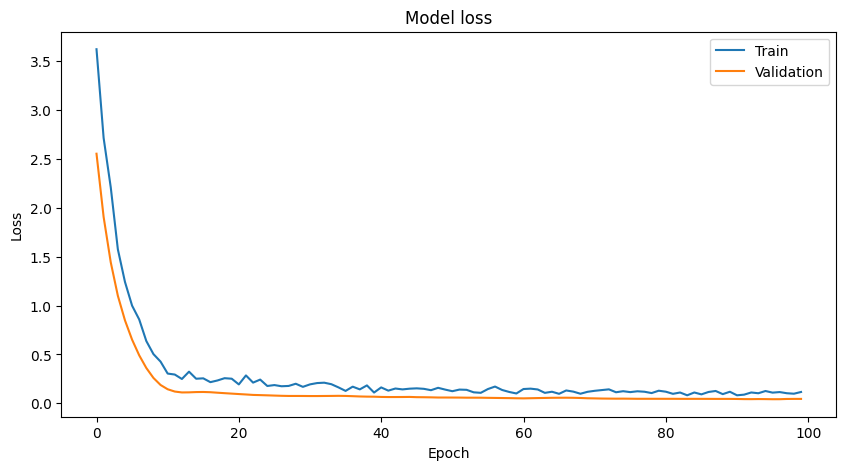

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

# Function to load and preprocess the datasets
def load_and_preprocess_data(dataset_name):
    if dataset_name == "california_housing":
        data = fetch_california_housing()
        X = data.data
        y = data.target
    elif dataset_name == "wine_quality":
        data = load_wine(as_frame=True)
        X = data.data
        y = data.target
    # Add more elif blocks for other datasets here...

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test

# Function to build and train a feed-forward neural network
def build_and_train_model(X_train, y_train, X_test, y_test):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)  # Output layer (1 neuron for regression)
    ])

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_split=0.2, callbacks=[early_stopping, checkpoint])

    # Load the best model checkpoint
    model.load_weights('best_model.h5')

    # Evaluate the model on test data
    y_pred = model.predict(X_test)

    return model, y_pred, history.history

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(10, 5))

    # Plot training & validation loss values
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Function to evaluate the model
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")

# Main function to run the pipeline
def run_regression_pipeline(dataset_name):
    X_train, X_test, y_train, y_test = load_and_preprocess_data(dataset_name)
    model, y_pred, history = build_and_train_model(X_train, y_train, X_test, y_test)
    evaluate_model(y_test, y_pred)
    plot_training_history(history)

# Example usage:
if __name__ == '__main__':
    datasets = ["california_housing", "wine_quality"]  # Add more dataset names here
    for dataset in datasets:
        print(f"Running pipeline for {dataset} dataset...")
        run_regression_pipeline(dataset)
        print("\n")

#2. Convolutional Neural Networks with MNIST dataset

Running MNIST CNN pipeline...
Epoch 1/6
1875/1875 [==============================] - 177s 94ms/step - loss: 0.3735 - accuracy: 0.8821 - val_loss: 0.0410 - val_accuracy: 0.9856 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/6
1875/1875 [==============================] - 164s 87ms/step - loss: 0.1705 - accuracy: 0.9502 - val_loss: 0.0314 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 3/6
1875/1875 [==============================] - 167s 89ms/step - loss: 0.1365 - accuracy: 0.9592 - val_loss: 0.0271 - val_accuracy: 0.9897 - lr: 0.0010
Epoch 4/6
1875/1875 [==============================] - 167s 89ms/step - loss: 0.1183 - accuracy: 0.9650 - val_loss: 0.0327 - val_accuracy: 0.9887 - lr: 0.0010
Epoch 5/6
1875/1875 [==============================] - 163s 87ms/step - loss: 0.1065 - accuracy: 0.9685 - val_loss: 0.0260 - val_accuracy: 0.9928 - lr: 0.0010
Epoch 6/6
313/313 [==============================] - 6s 21ms/step - loss: 0.0200 - accuracy: 0.9939
Test Accuracy: 99.39%


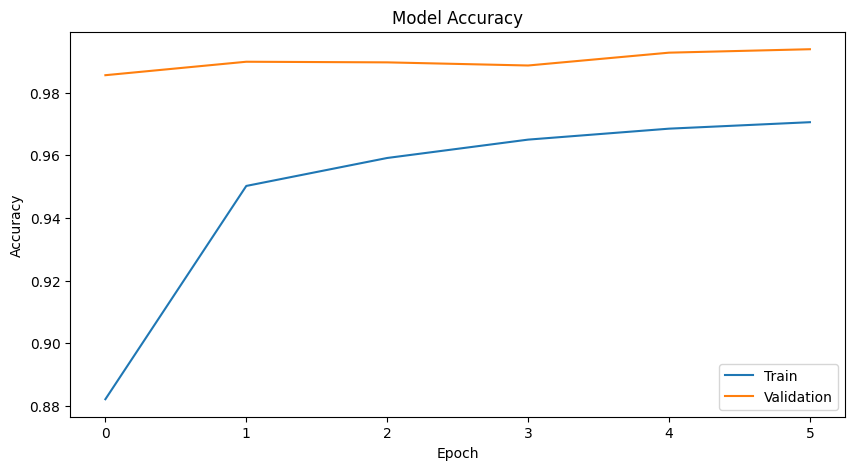

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the MNIST dataset
def load_and_preprocess_mnist():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalize pixel values to the range [0, 1]
    X_train = X_train.astype('float32') / 255.0
    X_test = X_test.astype('float32') / 255.0

    # Reshape input data to add channel dimension (for convolutional layers)
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    return X_train, y_train, X_test, y_test

# Build and train the CNN model for MNIST
def build_and_train_mnist_cnn(X_train, y_train, X_test, y_test):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
    def scheduler(epoch, lr):
        if epoch < 10:
            return lr
        else:
            return lr * tf.math.exp(-0.1)

    lr_scheduler = LearningRateScheduler(scheduler)
    checkpoint = ModelCheckpoint('best_model_mnist.h5', monitor='val_accuracy', save_best_only=True)

    # Data augmentation
    datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1,
                                 shear_range=0.2, zoom_range=0.1)
    datagen.fit(X_train)

    # Train the model
    history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                        steps_per_epoch=len(X_train) / 32, epochs=6,
                        validation_data=(X_test, y_test), callbacks=[lr_scheduler, checkpoint])

    # Load the best model checkpoint
    model.load_weights('best_model_mnist.h5')

    # Evaluate the model on test data
    _, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    return model, history.history

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(10, 5))

    # Plot training & validation accuracy values
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()

# Main function to run the pipeline
def run_mnist_cnn_pipeline():
    X_train, y_train, X_test, y_test = load_and_preprocess_mnist()
    model, history = build_and_train_mnist_cnn(X_train, y_train, X_test, y_test)
    plot_training_history(history)
    return model

# Run the MNIST CNN pipeline
if __name__ == '__main__':
    print("Running MNIST CNN pipeline...")
    mnist_cnn_model = run_mnist_cnn_pipeline()

1/1 [==============================] - 0s 22ms/step


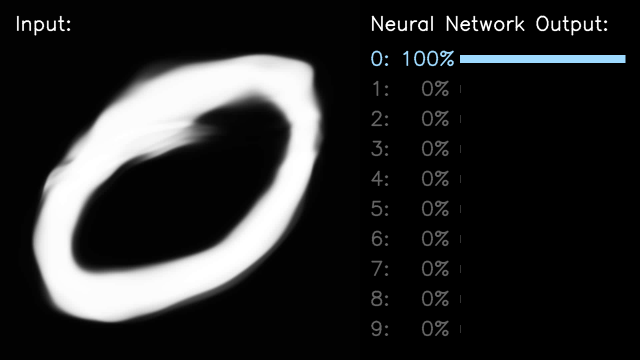

In [ ]:
# Set common constants
this_repo_url = 'https://github.com/lexfridman/mit-deep-learning/raw/master/'
this_tutorial_url = this_repo_url + 'tutorial_deep_learning_basics'

mnist_dream_path = 'images/mnist_dream.mp4'
mnist_prediction_path = 'images/mnist_dream_predicted.mp4'

def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

# download the video if running in Colab
if not os.path.isfile(mnist_dream_path):
    print('downloading the sample video...')
    vid_url = this_tutorial_url + '/' + mnist_dream_path

    mnist_dream_path = urllib.request.urlretrieve(vid_url)[0]

def cv2_imshow(img):
    ret = cv2.imencode('.png', img)[1].tobytes()
    img_ip = IPython.display.Image(data=ret)
    IPython.display.display(img_ip)

cap = cv2.VideoCapture(mnist_dream_path)
vw = None
frame = -1 # counter for debugging (mostly), 0-indexed

# go through all the frames and run our classifier on the high res MNIST images as they morph from number to number
while True: # should 481 frames
    frame += 1
    ret, img = cap.read()
    if not ret: break

    assert img.shape[0] == img.shape[1] # should be a square
    if img.shape[0] != 720:
        img = cv2.resize(img, (720, 720))

    #preprocess the image for prediction
    img_proc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_proc = cv2.resize(img_proc, (28, 28))
    img_proc = preprocess_images(img_proc)
    img_proc = 1 - img_proc # inverse since training dataset is white text with black background

    net_in = np.expand_dims(img_proc, axis=0) # expand dimension to specify batch size of 1
    net_in = np.expand_dims(net_in, axis=3) # expand dimension to specify number of channels

    preds = mnist_cnn_model.predict(net_in)[0]
    guess = np.argmax(preds)
    perc = np.rint(preds * 100).astype(int)

    img = 255 - img
    pad_color = 0
    img = np.pad(img, ((0,0), (0,1280-720), (0,0)), mode='constant', constant_values=(pad_color))

    line_type = cv2.LINE_AA
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.3
    thickness = 2
    x, y = 740, 60
    color = (255, 255, 255)

    text = "Neural Network Output:"
    cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)

    text = "Input:"
    cv2.putText(img, text=text, org=(30, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)

    y = 130
    for i, p in enumerate(perc):
        if i == guess: color = (255, 218, 158)
        else: color = (100, 100, 100)

        rect_width = 0
        if p > 0: rect_width = int(p * 3.3)

        rect_start = 180
        cv2.rectangle(img, (x+rect_start, y-5), (x+rect_start+rect_width, y-20), color, -1)

        text = '{}: {:>3}%'.format(i, int(p))
        cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)
        y += 60

    # if you don't want to save the output as a video, set this to False
    save_video = True

    if save_video:
        if vw is None:
            codec = cv2.VideoWriter_fourcc(*'DIVX')
            vid_width_height = img.shape[1], img.shape[0]
            vw = cv2.VideoWriter(mnist_prediction_path, codec, 30, vid_width_height)
        # 15 fps above doesn't work robustly so we right frame twice at 30 fps
        vw.write(img)
        vw.write(img)

    # scale down image for display
    img_disp = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
    cv2_imshow(img_disp)
    IPython.display.clear_output(wait=True)

cap.release()
if vw is not None:
    vw.release()